In [1]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd

import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [2]:
df = yf.Ticker("^GSPC") # downloads S&P500 data
df = df.history(period="max") # all data since start of the index
df


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-10-24 00:00:00-04:00,4235.790039,4259.379883,4219.430176,4247.680176,3821820000,0.0,0.0
2023-10-25 00:00:00-04:00,4232.419922,4232.419922,4181.419922,4186.770020,3869370000,0.0,0.0
2023-10-26 00:00:00-04:00,4175.990234,4183.600098,4127.899902,4137.229980,4277640000,0.0,0.0


In [3]:
df.drop(["Dividends","Stock Splits"], axis=1, inplace=True)

In [4]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


In [5]:
df.index = pd.to_datetime(df.index)


# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
               vertical_spacing=0.08, subplot_titles=('S&P500', 'Volume'),
               row_width=[0.2, 0.7])

# Plot data
fig.add_trace(go.Candlestick(x=df.index, open=df["Open"], high=df["High"],
                low=df["Low"], close=df["Close"], name="S&P"),
                row=1, col=1)

fig.update_layout(
    title="S&P500",
    yaxis_title="S&P500 Stock Price")

# Plot volume
fig.add_trace(go.Bar(x=df.index, y=df['Volume'], showlegend=False), row=2, col=1)

fig.update(layout_xaxis_rangeslider_visible=False)
fig.show()

In [6]:
close_df = df["Close"]
close_df = pd.DataFrame(close_df)
close_df

,Close
Date,
1927-12-30 00:00:00-05:00,17.660000
1928-01-03 00:00:00-05:00,17.760000
1928-01-04 00:00:00-05:00,17.719999
1928-01-05 00:00:00-05:00,17.549999
1928-01-06 00:00:00-05:00,17.660000
...,...
2023-10-24 00:00:00-04:00,4247.680176
2023-10-25 00:00:00-04:00,4186.770020
2023-10-26 00:00:00-04:00,4137.229980


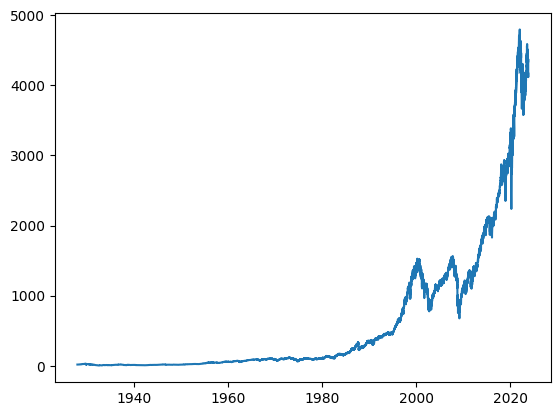

In [7]:
close_df.index = pd.to_datetime(close_df.index)

plt.plot(close_df.index, close_df["Close"])

In [8]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
  df = dc(df)
  try:
    df.index = pd.to_datetime(df.index)
  except:
    df["Date"] = pd.to_datetime(df["Date"])
    df.set_index("Date", inplace=True)

  for i in range(1, n_steps+1):
    df[f"Close_(t-{i})"] = df["Close"].shift(i)

  # shifting along horizons will produce NA values
  df.dropna(inplace=True)

  return df




lookback=7
shifted_df = prepare_dataframe_for_lstm(close_df, lookback)
shifted_df


,Close,Close_(t-1),Close_(t-2),Close_(t-3),Close_(t-4),Close_(t-5),Close_(t-6),Close_(t-7)
Date,,,,,,,,
1928-01-11 00:00:00-05:00,17.350000,17.370001,17.500000,17.660000,17.549999,17.719999,17.760000,17.660000
1928-01-12 00:00:00-05:00,17.469999,17.350000,17.370001,17.500000,17.660000,17.549999,17.719999,17.760000
1928-01-13 00:00:00-05:00,17.580000,17.469999,17.350000,17.370001,17.500000,17.660000,17.549999,17.719999
1928-01-16 00:00:00-05:00,17.290001,17.580000,17.469999,17.350000,17.370001,17.500000,17.660000,17.549999
1928-01-17 00:00:00-05:00,17.299999,17.290001,17.580000,17.469999,17.350000,17.370001,17.500000,17.660000
...,...,...,...,...,...,...,...,...
2023-10-24 00:00:00-04:00,4247.680176,4217.040039,4224.160156,4278.000000,4314.600098,4373.200195,4373.629883,4327.779785
2023-10-25 00:00:00-04:00,4186.770020,4247.680176,4217.040039,4224.160156,4278.000000,4314.600098,4373.200195,4373.629883
2023-10-26 00:00:00-04:00,4137.229980,4186.770020,4247.680176,4217.040039,4224.160156,4278.000000,4314.600098,4373.200195


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
shifted_df_as_np = scaler.fit_transform(shifted_df)

shifted_df_as_np

array([[-0.99459534, -0.99458699, -0.99453274, ..., -0.99444092,
        -0.99442423, -0.99446596],
       [-0.99454526, -0.99459534, -0.99458699, ..., -0.99451187,
        -0.99444092, -0.99442423],
       [-0.99449935, -0.99454526, -0.99459534, ..., -0.99446596,
        -0.99451187, -0.99444092],
       ...,
       [ 0.72482969,  0.74550515,  0.7709259 , ...,  0.78357983,
         0.79885481,  0.82331147],
       [ 0.71654121,  0.72482969,  0.74550515, ...,  0.76110986,
         0.78357983,  0.79885481],
       [ 0.73717896,  0.71654121,  0.72482969, ...,  0.75813829,
         0.76110986,  0.78357983]])

In [10]:
X = shifted_df_as_np[:,1:] # all data except Close column
y = shifted_df_as_np[:,0]

X.shape, y.shape

((24066, 7), (24066,))

In [11]:
X = dc(np.flip(X, axis=1)) # from close_t-7 to close_t-1 order
X

array([[-0.99446596, -0.99442423, -0.99444092, ..., -0.99446596,
        -0.99453274, -0.99458699],
       [-0.99442423, -0.99444092, -0.99451187, ..., -0.99453274,
        -0.99458699, -0.99459534],
       [-0.99444092, -0.99451187, -0.99446596, ..., -0.99458699,
        -0.99459534, -0.99454526],
       ...,
       [ 0.82331147,  0.79885481,  0.78357983, ...,  0.75813829,
         0.7709259 ,  0.74550515],
       [ 0.79885481,  0.78357983,  0.76110986, ...,  0.7709259 ,
         0.74550515,  0.72482969],
       [ 0.78357983,  0.76110986,  0.75813829, ...,  0.74550515,
         0.72482969,  0.71654121]])

In [12]:
split_index = int(len(X) * .95)
split_index

22862

In [13]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22862, 7), (1204, 7), (22862,), (1204,))

In [15]:
# For LSTM we need an extra dimension so reshaping all data

X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1,lookback,1))


y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22862, 7, 1), (1204, 7, 1), (22862, 1), (1204, 1))

# Pytorch

In [16]:
import torch
from torch import nn

In [17]:
device = "cuda" if torch.cuda.is_available else "cpu"
device

'cuda'

In [18]:
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()

y_train = torch.tensor(y_train).float()
y_test = torch.tensor(y_test).float()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([22862, 7, 1]),
 torch.Size([1204, 7, 1]),
 torch.Size([22862, 1]),
 torch.Size([1204, 1]))

In [19]:
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
  def __init__(self,X,y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self,i):
    return self.X[i], self.y[i]


train_dataset = TimeSeriesDataset(X_train, y_train)

test_dataset = TimeSeriesDataset(X_test, y_test)


In [20]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Building a LSTM model

In [21]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_stacked_layers):
    super().__init__()

    self.hidden_size = hidden_size
    self.num_stacked_layers = num_stacked_layers
    self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)


  def forward(self, X):
    batch_size = X.size(0)

    h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
    c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

    out, _ = self.lstm(X, (h0,c0))
    out = self.fc(out[:,-1,:])

    return out


model = LSTM(1,4,1)
model.to(device)
model



LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [22]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 7, 1]) torch.Size([16, 1])


In [23]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0
    print()

In [24]:
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

    avg_loss_across_batches = running_loss / len(test_loader)

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [25]:
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.206
Batch 200, Loss: 0.043
Batch 300, Loss: 0.028
Batch 400, Loss: 0.008
Batch 500, Loss: 0.003
Batch 600, Loss: 0.002
Batch 700, Loss: 0.002
Batch 800, Loss: 0.001
Batch 900, Loss: 0.001
Batch 1000, Loss: 0.001
Batch 1100, Loss: 0.001
Batch 1200, Loss: 0.001
Batch 1300, Loss: 0.001
Batch 1400, Loss: 0.000

Val Loss: 0.250
***************************************************

Epoch: 2
Batch 100, Loss: 0.001
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000
Batch 700, Loss: 0.000
Batch 800, Loss: 0.000
Batch 900, Loss: 0.000
Batch 1000, Loss: 0.000
Batch 1100, Loss: 0.000
Batch 1200, Loss: 0.000
Batch 1300, Loss: 0.000
Batch 1400, Loss: 0.000

Val Loss: 0.144
***************************************************

Epoch: 3
Batch 100, Loss: 0.000
Batch 200, Loss: 0.000
Batch 300, Loss: 0.000
Batch 400, Loss: 0.000
Batch 500, Loss: 0.000
Batch 600, Loss: 0.000
Batch 700, Loss: 0.000
Batch 800, Loss: 0

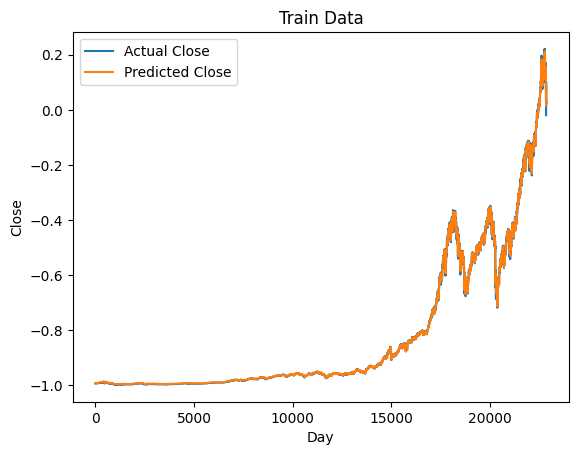

In [26]:
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.title("Train Data")
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

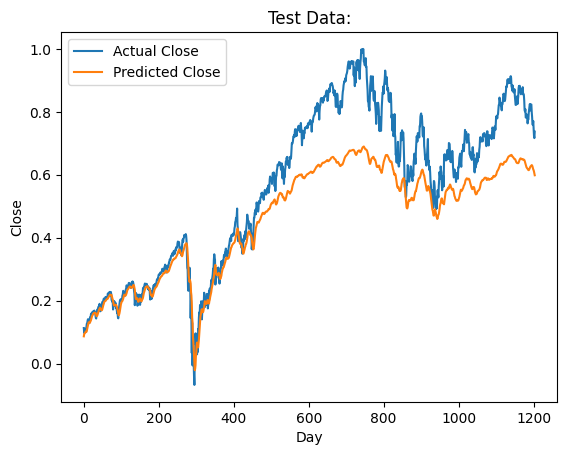

In [27]:
with torch.no_grad():
    test_predicted = model(X_test.to(device)).to('cpu').numpy()

plt.plot(y_test, label='Actual Close')
plt.plot(test_predicted, label='Predicted Close')
plt.title("Test Data:")
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [28]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([  20.18890306,   20.12606336,   20.10821118, ..., 2580.25751884,
       2589.0520062 , 2596.74737009])

In [29]:
dummies = np.zeros((X_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([  17.34997682,   17.46994352,   17.58005581, ..., 2610.30005451,
       2616.10010522, 2635.95996744])

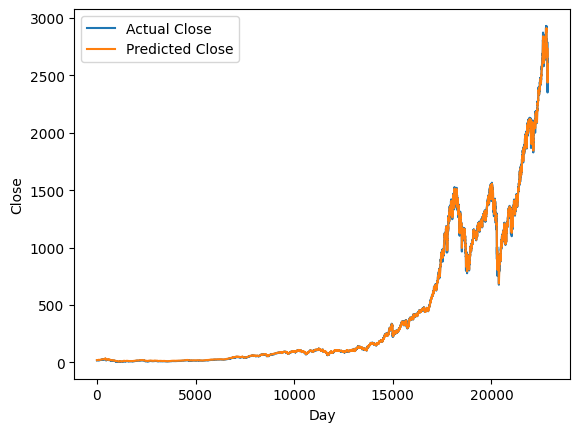

In [30]:
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [31]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([2607.4528627 , 2624.89041517, 2628.99513291, ..., 3862.42635921,
       3847.59190559, 3834.26289123])

In [32]:
dummies = np.zeros((X_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([2670.70996425, 2632.89990615, 2638.69995686, ..., 4137.22993527,
       4117.37016231, 4166.81986443])

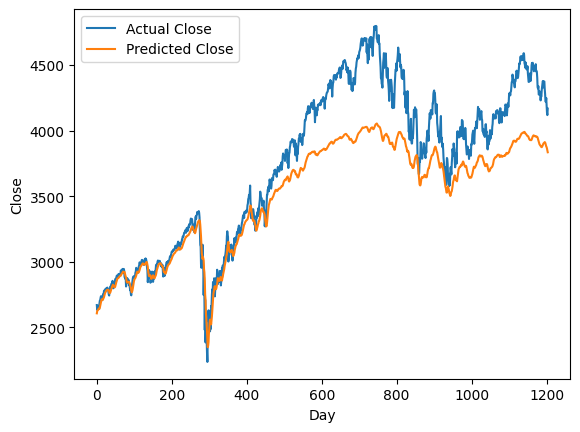

In [33]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()